### ForSlide
スライド用画像の作成ファイル　  
ファイルを軽くするために，必ず```plt.close()```すること

In [1]:
import MDUS
from MDUS import Analysis
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': '2011/06/25 21:16:23 - 2011/06/25 22:45:35'}, xlabel='UTC', ylabel='Magnetic Field [nT]'>)

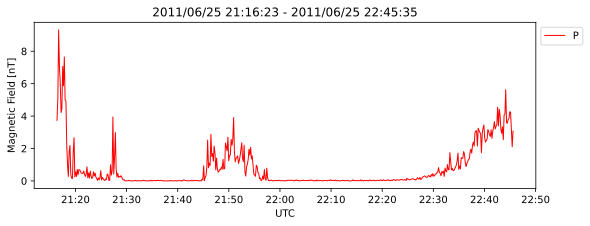

In [2]:
orbit = 199
data_199 = MDUS.ScanData()
data_199.Input(orbit=orbit)
data_199.DataIntegration()
data_199.MLAT()
data_199.NTP()

data_199.PlotMag(component={'P':'red'})

In [ ]:
orbit = 199
data_199 = MDUS.ScanData()
data_199.Input(orbit=orbit)
data_199.DataIntegration()
data_199.MLAT()
data_199.NTP()

if orbit in MDUS.dip.index:
    dt = np.abs(data_199.value["MLAT"]).idxmin()
    ds = MDUS.dip.query('index == @orbit')['start'].values[0]
    de = MDUS.dip.query('index == @orbit')['end'].values[0]
else:
    dt = np.abs(data_199.value["MLAT"]).idxmin()
    ds = dt - pd.Timedelta(minutes=5)
    de = dt + pd.Timedelta(minutes=5)   

fig, ax = data_199.PlotMag()
fig, ax = data_199.Plot()
ax2 = ax.twinx()
fig, ax2 = data_199.PlotMag(component={'T':'black'},ds=ds,de=de,fig=fig, ax = ax2,filename='Temp_Scan_199')

orbit = 200
data_200 = MDUS.ScanData() 
data_200.Input(orbit=orbit)
data_200.DataIntegration()
data_200.MLAT()
data_200.NTP()

if orbit in MDUS.dip.index:
    dt = np.abs(data_200.value["MLAT"]).idxmin()
    ds = MDUS.dip.query('index == @orbit')['start'].values[0]
    de = MDUS.dip.query('index == @orbit')['end'].values[0]
else:
    dt = np.abs(data_200.value["MLAT"]).idxmin()
    ds = dt - pd.Timedelta(minutes=5)
    de = dt + pd.Timedelta(minutes=5)

fig, ax = data_200.PlotMag()
fig, ax = data_200.Plot()
ax2 = ax.twinx()
fig, ax2 = data_200.PlotMag(component={'T':'black'},ds=ds,de=de,fig=fig, ax = ax2,filename='Temp_Scan_200')

orbit = 201
data_201 = MDUS.ScanData()
data_201.Input(orbit=orbit)
data_201.DataIntegration()
data_201.MLAT()
data_201.NTP()

if orbit in MDUS.dip.index:
    dt = np.abs(data_201.value["MLAT"]).idxmin()
    ds = MDUS.dip.query('index == @orbit')['start'].values[0]
    de = MDUS.dip.query('index == @orbit')['end'].values[0]
else:
    dt = np.abs(data_201.value["MLAT"]).idxmin()
    ds = dt - pd.Timedelta(minutes=5)
    de = dt + pd.Timedelta(minutes=5)

fig, ax = data_201.PlotMag()
fig, ax = data_201.Plot()
ax2 = ax.twinx()
fig, ax2 = data_201.PlotMag(component={'T':'black'},ds=ds,de=de,fig=fig, ax = ax2,filename='Temp_Scan_201')

In [ ]:
data = MDUS.ScanData()
data.Input(start='2011/09/12 03:40:00', end='2011/09/12 06:15:00')
data.DataIntegration()

data.PlotMag()

In [ ]:
tmp = MDUS.MagData()
tmp.Info()

In [ ]:
orbit = 201
data = MDUS.ScanData()
data.Input(orbit=orbit)
data.DataIntegration()

fig, ax = data.Plot()
ax2 = ax.twinx()
data.PlotMag(fig=fig,ax=ax2)
data.PlotOrbit()
# data.PlotOrbit()
# data.PlotMag(fig=fig,ax=ax2,filename='201')

In [ ]:
orbit = 199
ds_199 = MDUS.dip.query('orbit == @orbit')['start'].values[0]
de_199 = MDUS.dip.query('orbit == @orbit')['end'].values[0]
data_199 = MDUS.MagData()
data_199.Input(orbit=orbit,sec=10)
data_199.CalcKTH22()
data_199.MLAT()

fig, ax = plt.subplots(figsize=(9,3))  
ax.axvline(ds_199,color='grey')
ax.axvline(de_199,color='grey')
ax.axvspan(ds_199,de_199, color='grey', alpha=0.2)
data_199.Plot(fig=fig,ax=ax,filename='orbit_199_model',component={'|B|':'black','|B|_KTH22':'red'})

data_199.Plot(component={'Bx':'blue','Bx_KTH22':'green','Bz':'red','Bz_KTH22':'orange'},ds=ds_199,de=de_199,filename='199_dip_model')

In [ ]:
orbit = 199
data_199 = MDUS.MagData()
data_199.Input(orbit=orbit,sec=10)
data_199.MLAT()
ds_199 = data_199.value.query('-20< MLAT < 20').index.values[0]
de_199 = data_199.value.query('-20< MLAT < 20').index.values[-1]

ds_199 = MDUS.dip.query('orbit == @orbit')['start'].values[0]
de_199 = MDUS.dip.query('orbit == @orbit')['end'].values[0]

print((de_199-ds_199).astype('timedelta64[s]'))

fig, ax = plt.subplots(figsize=(9,3))  
ax.axvline(ds_199)
ax.axvline(de_199)
data_199.Plot(fig=fig,ax=ax,filename='orbit_199')
orbit = 200
data_200 = MDUS.MagData()


data_200.Input(orbit=orbit,sec=10)    
data_200.MLAT()
fig, ax = data_200.Plot(filename='orbit_200')
ds_200 = data_200.value.query('-20< MLAT < 20').index.values[0]
de_200 = data_200.value.query('-20< MLAT < 20').index.values[-1]
# ax.axvline(ds_200)
# ax.axvline(de_200)

In [ ]:
fig, ax = data_199.PlotOrbit(label='199')
data_200.PlotOrbit(label='200',ax=ax,fig=fig,color='blue',filename='orbit_199_200_XY')
fig, ax = data_199.PlotOrbit(label='199',coordinate='XZ')
data_200.PlotOrbit(label='200',ax=ax,fig=fig,color='blue',coordinate='XZ',filename='orbit_199_200_XZ')

In [ ]:
tmp = 'XX'
'Y' in tmp

In [5]:
import numpy as np